# JSON Exercise: Lauren Broussard 

****
## Instructions

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated in the *sliderule_dsi_json_exercise notebook*: 

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
****


In [1]:
#import necessary libraries & modules

import pandas as pd

import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

In [2]:
#load json file as dataframe to see sample data
world_bank = pd.read_json('data/world_bank_projects.json')
world_bank.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [3]:
#get column names
print(world_bank.columns)

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')


## 1) Find the 10 countries with the most projects

In [4]:
#select 'countryname' column and get counts of top 10 countries
projects_top10 = world_bank['countryname'].value_counts()[:10]
projects_top10

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

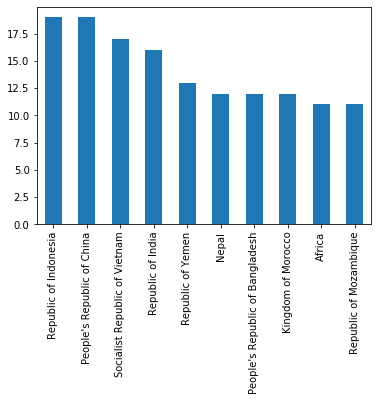

In [5]:
#display bar graph of top 10 countries
projects_top10.plot(kind='bar')
plt.show()

## 2) Find the top 10 major project themes (using column 'mjtheme_namecode')

In [14]:
#load json data again as list
data = json.load((open('data/world_bank_projects.json')))

#normalize 'mjtheme_namecode'column
project_themes= json_normalize(data, 'mjtheme_namecode',['mjtheme'],errors='ignore')

In [15]:
#select 'names' column to display top 10 themes
projects_top10 = project_themes['name'].value_counts()[:10]
projects_top10

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

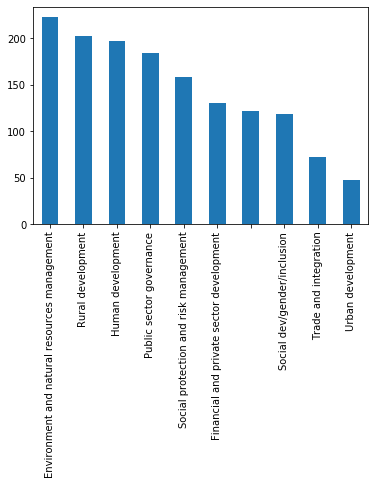

In [16]:
projects_top10.plot(kind='bar')
plt.show()

## 3) In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [17]:
#find rows with missing name value
missing_theme = project_themes[project_themes['name'] == '']
missing_theme

,code,name,mjtheme
1,11,,[Human development]
13,6,,[Social protection and risk management]
17,8,,[Environment and natural resources management]
19,7,,[Rural development]
24,2,,[Rural development]
...,...,...,...
1457,4,,[Human development]
1477,11,,[Rural development]
1481,5,,[Environment and natural resources management]
1483,8,,[Social protection and risk management]


In [19]:
#dataframe with missing 'name' filled with 'Theme Missing'
project_themes['name'] = project_themes['name'].replace('','Missing Theme')
project_themes

,code,name,mjtheme
0,8,Human development,[Human development]
1,11,Missing Theme,[Human development]
2,1,Economic management,"[Economic management, Social protection and ri..."
3,6,Social protection and risk management,"[Economic management, Social protection and ri..."
4,5,Trade and integration,"[Trade and integration, Public sector governan..."
...,...,...,...
1494,10,Rural development,"[Rural development, Rural development, Rural d..."
1495,9,Urban development,"[Urban development, Human development, Trade a..."
1496,8,Human development,"[Urban development, Human development, Trade a..."
1497,5,Trade and integration,"[Urban development, Human development, Trade a..."


In [ ]:
#TO DOdataframe with missing 'name' filled with 'mjtheme' column value
